# 「**Deep Learning**の扉」　　
### ②**Python**を使ってニューラルネットワークを学ぶ　　
___________________________________________________

## 1. 「Deep Learning」の世界へ出発！　

出発する前に少しお話。

前回はパーセプトロンについて学び、Pythonを用いて論理回路を実装しました。

そこでは便利な点を説明しましたが、実はパーセプトロンには不便な点も存在します。

それは、重みの値を決めるときは、人の手によって行われるということです。

実際に、ANDやORゲートを実装するときに自分で条件を満たす値を決めました。

そこで今回は不便な点を解決する  

#### **「ニューラルネットワーク」**

について学んでいきます！

そしてニューラルネットワークの学習が終わると

#### 「活性化関数」

#### 「多次元配列の計算」

#### 「手書き数字認識」

の順番に学んでいきます！

それでは楽しんでいきましょう！

### Let's go!!
______________________________

## 2. ニューラルネットワーク

突然ですが、ニューラルネットワークを図で表すと以下のようになります。

<img src = "img2_1.png" style="width: 500px; float:left;">

図2-1

ここで、一番左の列を入力層、一番右の列を出力層、中間の列を中間層（隠れ層）と呼びます。

そして入力層から出力層に向かって、順番に第０層、第１層、第２層と呼ぶことにします。

つまり第０層が入力層、第１層が中間層、第２層が出力層に対応することがわかります。

上図を見る限り、前回学習したパーセプトロンに似ていることがわかります。

それではどのように信号を伝達するのか見ていきましょう。

### 2-1. パーセプトロンの復習

これからニューラルネットワークにおける信号の伝達方法を学習していきますが、

その前にパーセプトロンの復習をしていきます。

パーセプトロンの図を思い出してみてください。

どうですか？思い出しましたか？

<img src = "img2_2.png" style="width: 500px; float:left;">

図2-2

パーセプトロンは上図のように表され、**「x１」**と**「x２」**の２つの入力信号を受け取り、**「y」**を出力していることがわかります。

そして上図は次の式で表されます。

$$
  f(x) = \left\{ \begin{array}{ll}
    1　(b + w1x1 + w2x2 >0) \\
    0　(b + w1x1 + w2x2 ≦0)
  \end{array} \right.
$$

**「b」**はバイアスと呼ばれるパラメータであり、

#### 「ニューロンの発火のしやすさ」

をコントロールします。

「b」を右辺に移動させてみてください。

そうすると、

$$w1x1 + w2x2 > -b$$

という式になります。

つまり、入力に重みをかけた式が「-b」という値を超えた時だけ、「１」を返します（超えた時だけニューロンが発火する）。

では、具体的に考えてみましょう。

バイアス「-b」を壁だと考えてください。

「-b = 100000」の壁と「-b = 1」の壁。

どっちが超えやすいでしょうか？

小さい壁の方が超えやすいですよね。

つまり、バイアスの値が小さい方が発火しやすいということが言えます。

このことから「b」というバイアスは「ニューロンの発火のしやすさ」をコントロールしているということがわかります。

<img src='img2_30.png' style="width: 500px; float:left;" >



図2-3

また、**「w１」**や**「w２」**は各信号の「重み」を表すパラメータで、

#### 「各信号の重要性」

をコントロールします。

あれ？図２にはバイアスが図示されてない…どういうこと？

となったかもしれません。

そこでバイアスを明示した図を以下に示します。

<img src = "img2_3.png" style="width: 400px; float:left;">

図2-4

上図には重みが「b」で入力が１の信号が追加されています。

つまり、このパーセプトロンの入力は

#### 「x１」と「x２」と「１」

になります。

そして、これらの３つの信号にそれぞれの重みが乗算（積）され、次のニューロンに送られることが見て取れます。

また、次のニューロンでは、それらの重み付き信号の和が計算されます。

#### その和が「０」を超えたら「１」を出力し、そうでなければ「０」を出力する

というのがパーセプトロンの仕組みでした。

そこで、新たな概念を導入します。

新たな概念！？なんだなんだ？

となるかもしれませんが、そこまで身構えなくても大丈夫です。

０を超えたら１を出力し、そうでなければ０を出力する「h(x)」という新しい関数を導入してあげるだけです。

それでは以下のようにパーセプトロンの式を書き換えてみましょう。

<img src = "img2_28.png" style="width:250px; float:left;">

見やすくなりましたね。

上式は、入力信号の総和が「h(x)」という関数によって変換され、その変換された値が出力yになるということを示しています。　

もしわかりにくい場合は以下のように考えるとスッキリするかもしれません。

<img src = "img2_4.png" style="width: 500px; float:left;">

図2-5

どうですか？

ここまでは前回の内容に新しい関数を加えただけなので、難しくはないと思います。

しかし、うーん。となった方はしっかり理解してから次に進むことをおすすめします。

### 2-2. 活性化関数

先ほど登場したh(x)という関数（入力信号の総和を出力信号に変換する関数）は、一般的に

#### 「活性化関数」

と呼ばれます。

先ほどの例だと以下のようになります。

<img src = "img2_29.png"  style="width:400px; float:left;">

なぜそのように呼ばれるのか。

それは、

#### 「活性化関数は入力信号の総和がどのように活性化するか（どのように発火するか）ということを決定する役割がある」

というところからきています。

活性化関数を導入したパーセプトロンの式を思い出してみてください。  

重みを乗算した入力信号を足し合わせ、その和が活性化関数によって変換される

といった感じでしたよね。

実際に手を動かしてみましょう。

##### 【問題2-1】以下の式を参考に活性化関数を導入したパーセプトロンの式を実装してください。

$$
  h(x) = \left\{ \begin{array}{ll}
    1　(x >0) \\
    0　(x ≦0)
  \end{array} \right.
$$

$$
  a = b + w1x1 + w2x2
$$

$$
  y = h(a)
$$

In [ ]:
def h(x):
    ######以下に活性化関数「h(x)」を実装してください######
    if :
        
    elif :
        

def per(x1, x2):
    w1, w2, b = 0.5, 0.5, -0.3
    ######以下にコードを書いてください######
    a = 
    y = 
    return 

print(per(0, 1))
######「Shift + Enter」を押してください######

「１」と表示されたら正解です。

さて、この「a」が「h()」で変換され「y」が出力されるというのは図で表すとどうなるのでしょうか。

以下にその図を示したいと思います。

<img src = "img2_5.png" style="width: 400px; float:left;">

図2-6

ここからは活性化関数を深く掘り下げていきたいと思います。

活性化関数はなんのためにあるの？

って思いますよね。

実はこの活性化関数がパーセプトロンからニューラルネットワークへ進むための架け橋になるのです。


先ほど説明していた活性化関数ですが、閾値を境にして出力が切り替わる関数であり、

#### 「ステップ関数」や「階段関数」

と呼ばれます。

つまり、パーセプトロンでは活性化関数にステップ関数を使っているということがわかります。

活性化関数にステップ関数を使う？

それならば、活性化関数に別の関数を使ったらどうなるの？

（ステップ関数以外の関数を使ったら、どうなるの？）

答えは、「ニューラルネットワークの世界に進むことができる！」です。

それでは色々な活性化関数を学んでみましょう！

_______________

### 2-2+α. 「イメージが湧かない方へ」

この章は、

#### 「バイアスだの、活性化関数だの。いきなりそんな概念の話されてもイメージするのが難しい！」

という方のために、具体的な例に置き換えて紹介するコーナーになります。

そのため、今までの内容がすんなり入ってきた方は、読み飛ばしてもらっても構いません。


では、始めていきましょう。

具体的な例として「たまご」を使います。

<img src='img2_31.png' style="width: 250px; float:left;">

皆さんは、ゆでたまごを作ったことはありますか？

たまごは、白身は63度から固化しはじめ、70度で黄身が固化するそうなんです。

では、

#### 「ニューロンが発火する」を「たまごの黄身が固化する」

に置き換えてみましょう。

これによって、入力値「x」はたまごの温度になります。

では、ゆでたまごを作るにはどうしたらいいのでしょうか。

そうですね。たまごに熱を加えればいいのです。

直接加えるというよりかは、お湯にたまごを浸して温めますよね。

なので、お湯に熱を加えるという風にしましょうか。

ところで、この熱を加えるという一手間は、今まで登場してきた言葉で言うと「重み」になります。

また、先ほども説明しましたが、「70度」で黄身が固化します。

このことから、「閾値」が「70度」であるということが言えますね。

つまり、「70度」を超えれば「黄身が完全に固まったゆでたまご」が完成し、「70度」を超えなければ「黄身が完全に固まったゆでたまご」ができないと考えることができます。

「０」を超えると「１」を出力し、「０」を超えなければ「０」を出力するパーセプトロンの**たまごバージョン**が完成しました。


<img src="img2_32.png" style="width: 450px; float:left;">

あれれ、じゃあ「バイアス」ってなんなのさ。となりますよね。

そこで、お湯の量を考えてみてください。

・お湯がない場合  
・少しだけの場合  
・たまごの半分だけが浸かる場合  
・たまごが完全に浸かる場合

それぞれの状況において、たまごの温まりやすさが違いますよね。

この温まりやすさを調節、コントロールするのが「バイアス」になります。


<img src="img2_33.png" style="width: 450px; float:left;">

では、活性化関数とは何なのか。

たまご料理を思い浮かべてみてください。

先ほどの説明にも出てきた「ゆでたまご」や「スクランブルエッグ」、「たまご焼き」、「目玉焼き」。

手間の加え方次第で、たまごは色々なたまご料理に変化します。

この手間の加え方が「活性化関数」になるのです。

ゆでたまごにしたければ、この関数、

スクランブルエッグにしたければ、あの関数というように、目的に応じて活性化関数を使い分けます。

どうでしょうか？

少しでもイメージが湧きやすくなりましたか？

それでは、次の章に進みましょう。

____________

### 2-3. ステップ関数

ステップ関数とは何かまとめると、

**「活性化関数の一種であり、閾値を境に「1」か「0」を出力する関数」**

になります。

活性化関数にステップ関数を使うと、パーセプトロンを作ることができます。

それでは、ステップ関数を実装してみましょう。

##### 【問題2-2】ステップ関数を実装してください。

$$
  h(x) = \left\{ \begin{array}{ll}
    1　(x >0) \\
    0　(x ≦0)
  \end{array} \right.
$$

In [ ]:
def step_function(x):
    ######以下にコードを書いてください######
    
    
    
print(step_function(-2.5))
######「Shift + Enter」を押してください######

「０」が表示されれば正解です。

正直、これは簡単ですね。

ですが引数の「x」には実数しか入力できないのです。

やっぱり一度に複数のデータを入力したいので、Numpyの配列を引数に取るような使い方ができないのは少し不便です。

ということで少し工夫してあげます。

In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)
######「Shift + Enter」を押してください######

ん？なんだこれ？ってなりますよね。

仕組みを説明していきます。

In [ ]:
######「x」に配列を代入します######
x = np.array([-1.0, 1.0, 2.0])

print(x)
######「Shift + Enter」を押してください######

次に「y」に「x」の値を代入するのですが、ただ代入するわけではありません。

「x」は配列なので、

x[0] = -1.0

x[1] = 1.0

x[2] = 2.0

といったように数値が格納されています。

そして、それぞれの値が「０」より大きいかどうかを確認していきます。

In [5]:
y = x > 0
######「Shift + Enter」を押してください######

「０」より大きいかどうかを確認？

じゃあ「y」には何が代入されているの？

Nnmpy配列に対して不等号の演算を行うと、配列の各要素に対して不等号の演算が行われ、ブーリアンの配列が生成されます。

ブーリアンってなんだっけ。という方のために説明すると

「真か偽」つまり「TrueかFalse」

を表すために使われるデータ型のことを指します。

ということは…

「０」より大きい数値は「True」で、「０」より小さい数値は「False」ってこと？

その通りです！

今回の場合では

In [7]:
print(y)
######「Shift + Enter」を押してください######

[False  True  True]


のように数値ではなく、ブーリアンの配列が生成されるのです。

しかし、実際自分が欲しいのは「０」か「１」の「int型」を出力する関数です。

つまり、ブーリアンからint型に変換する必要があります。

そこで登場するのが「astype()」メソッドです。

このメソッドはTrueを１にFalseを０に変換します。

In [ ]:
y = y.astype(np.int)
print(y)
######「Shift + Enter」を押してください######

これでステップ関数でも入力に配列を使えるようになりました。

次にステップ関数のグラフを表示してみましょう。

そのために、ライブラリとしてmatplotlibを使用します。

In [ ]:
######基本的に触らないでください######
conda install matplotlib

上記のコードは、下記のコードを試した時に

#### 「no module named 'matplotlib'」

と表示された場合のみ使用してください。

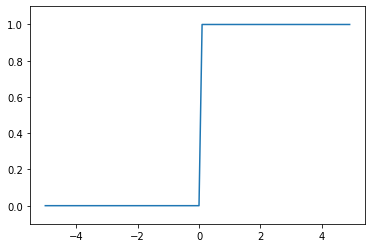

In [6]:
######コードは書き換えないでください######
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()
######「Shift + Enter」を押してください######

図2-7

先ほどのステップ関数は上記のように書き直すこともできます。

「arange(-5.0, 5.0, 0.1)」は

「-5.0から5.0までの範囲を0.1刻み」でNumpy配列を生成します。

[-5.0, -4.9, …, 4.9]といった感じに生成されます。

これらの数値をステップ関数に入力し、出力を「y」に代入します。

そして「x」と「y」の値をプロットします。

また、「ylim(-0.1, 1.1)」はy軸の範囲を指定します。

グラフから見て分かるように「x = 0」を境に出力が「０」から「１」へ切り替わります。

では、別の活性化関数について見ていきましょう。

### 2-4. シグモイド関数

シグモイド関数は次の式で表される関数です。

$$
  h(x) = \frac{1}{1 + exp(-x)}
$$


「exp(x)」は指数関数「e<sup>x</sup>」を示します。

これも「x」に何かの値を入力してあげれば、ある値を出力するといった簡単な関数です。

ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行い、その変換された信号が次のニューロンの伝えられるのです。

パーセプトロンとニューラルネットワークの違いは活性化関数の違いだけなのです。



##### 【問題2-3】以下の式を参考にシグモイド関数を実装してください。

$$
  h(x) = \frac{1}{1 + exp(-x)}\
$$

In [ ]:
import numpy as np
def sigmoid(x):
    
    
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))
######「Shift + Enter」を押してください######

[0.26894142, 0.73105858, 0.88079708]と表示されれば正解です。

exp(-x)ってどうやって表現するんだ。

となっている方は、「np.exp()」を使用してください。

シグモイド関数の引数「x」には、Numpy配列も入力することができます。

先ほどのステップ関数みたいにNumpy配列に対応するようにわざわざ書き換える必要がありません。

では、シグモイド関数をグラフに描画してみましょう。

##### 【問題2-4】シグモイド関数を描画してください。

In [21]:
import numpy as np
import matplotlib.pylab as plt
######以下にコードを書いてください######







######「Shift + Enter」を押してください######

下のような図になれば正解です。

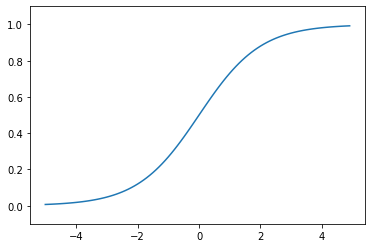

In [30]:
######この部分は触れないでください######
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

図2-8

### 2-5. ステップ関数とシグモイド関数の比較

ここでステップ関数とシグモイド関数の各グラフを重ねてみましょう。

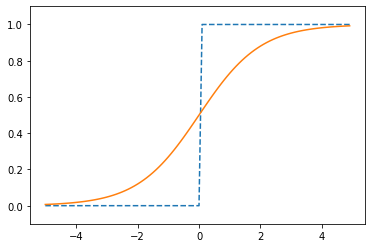

In [38]:
######以下のコードは触れないでください######
def step_function(x):
    return np.array(x > 0, dtype = np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle="dashed")
plt.plot(x, y2, linestyle="solid")
plt.ylim(-0.1, 1.1)
plt.show()

図2-9

見比べてみて何か思うことはありますか。

見ただけで分かるのは**「グラフの滑らかさの違い」**だと思います。

ステップ関数は「x = 0」を境に急に出力を変えていますが、シグモイド関数は滑らかで入力に対して連続的に出力が変化しています。

このシグモイド関数の滑らかさが、ニューラルネットワークの学習において意味を持ちます。

パーセプトロンでは、「０」か「１」のどちらかの値しか返さないのに対し、ニューラルネットワークでは「連続的な実数値」を返すことができるのです。

<img src = "img2_6.png" style="width: 500px; float:left;">

図2-10

確かに滑らかさは異なりましたが、グラフ全体の形に注目してみると同じような形をしてる気がしませんか？

木を見るんじゃなくて森を見る感じですね。

ステップ関数もシグモイド関数も両方とも入力が小さい時に出力は０に近づき、入力が大きくなるに従い出力が１に近づくという構造をしています。

（ステップ関数は０と１の値を取りますが、共通点として近づくという表現をしております。）

つまり、２つの関数は、

#### 「入力信号が重要な情報であれば大きな値を出力し、入力信号が重要でなければ小さな値を出力する」

ということがわかります。

そしてもう１つ重要なポイントがあります。それは、

#### 「入力信号の値がどんなに小さくても、またどんなに大きくても、出力信号の値を０から１の間に押し込める」

ということです。

### 2-6. 非線形関数

ステップ関数とシグモイド関数の共通点はまだあります。

それは、ともに非線形関数であるということです。

非線形関数と線形関数の違いは何？

まずは関数とはどういうものか思い出してください。

そうですね。関数とは、何かの値を入力すれば何かの値を返す「変換器」でした。

線形関数は、この変換器に何か入力したとき、出力が入力の定数倍になるような関数のことを指します。

具体的に言うと、

h(x) = cx　（cは定数）

といった式が線形関数になります。

この式から分かるように線形関数は真っ直ぐな一本の直線になります。

非線形関数は線形関数ではないという意味を持つので、線形関数のように単純な一本の直線でない関数を指します。

ここで関数の説明は終わって話を戻します。

ニューラルネットワークでは、活性化関数に線形関数ではなく非線形関数を用いる必要があります。

なぜ線形関数を用いてはいけないのか。

それは線形関数を用いると、ニューラルネットワークで層を深くすることの意味がなくなってしまうからです。

線形関数の問題点は、どんなに層を深くしても、それと同じことを行う「隠れ層のないネットワーク」が必ず存在する、という事実に起因します。

読むだけでは理解するのが難しいですね。ここで具体例を示します。

先ほども登場した「h(x) = cx」を活性化関数として考えてみます。

そして「y(x) = h(h(h(x)))」を行う計算を３層のネットワークに対応させて考えることにします。

この計算は、「y(x) = c * c * c * x」の掛け算を行いますが、

「y(x) = ax（a = c^3）」の一回の掛け算に書き換えることができます。

つまり、３層のネットワークを隠れ層のないネットワークで表現できるのです。

層を重ねることに意味があるのに、線形関数を用いてしまうと台無しにしてしまいます。

このことから活性化関数に非線形関数を使う必要があるのです。

### 2-7. ReLU関数

今まではステップ関数とシグモイド関数を紹介してきました。

ここで新しい関数を紹介したいと思います。

それは**「ReLU関数」**です！

最近では、ReLU関数が主に用いられているそうです。

ReLU関数は、入力が０を超えていれば、その入力をそのまま出力し、０以下ならば０を出力する関数です。

文章を読むだけでは少し退屈ですよね。

手を動かしてみましょう。

##### 【問題2-5】以下の式を参考にReLU関数を実装してください。


$$
  h(x) = \left\{ \begin{array}{ll}
    x　(x >0) \\
    0　(x ≦0)
  \end{array} \right.
$$

In [1]:
def ReLU(x):
    ######以下にコードを書いてください######
    
    
    
    
    
print(ReLU(1))
######「Shift + Enter」を押してください######

1


「１」と表示されれば正解です。

おそらく、「np.maximum()」を使わずに「if」で条件分けしたのではないでしょうか。

もちろんそれでも構いませんが、「np.maximum()」を用いた方がシンプルに実装することができます。

またNumpyの関数であるため配列を扱うこともできます。

この関数は

#### 「入力された値から大きい方の値を選んで出力する関数」

です。

では書き直してみます。

In [ ]:
######以下のコードは触らないでください######
import numpy as np

def ReLU(x):
    return np.maximum(0, x)

x = np.array([0, 2.0, -1.5])
y = ReLU(x)
print(y)
######「Shift + Enter」を押してください######

np.maximum()の片方の数値を「０」にすることで、入力された値と比較し、

０より入力値が大きければ、入力値をそのまま出力し、

０より入力値が小さければ、０を出力する

といった関数になっています。

これはまさに「ReLU関数」ですね。

ではグラフ化してみましょう。

##### 【問題2-6】ReLU関数のグラフを描画してください。

##### y軸の値は「-1.0から5.0」にするのがオススメです。

In [ ]:
import numpy as np
import matplotlib.pylab as plt

######以下にコードを書いてください######
######np.maximum()を使って実装してください######
def ReLU(x):
    

######以下にグラフを描画するコードを書いてください######    
    
    
     
######「Shift + Enter」を押してください######

以下のようなグラフが表示されれば正解です。

xが「０」を超えると入力値をそのまま出力していることがわかりますね。

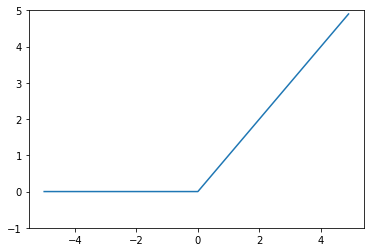

In [3]:
import numpy as np
import matplotlib.pylab as plt

######以下にコードを書いてください######
######np.maximum()を使って実装してください######
def ReLU(x):
    return np.maximum(0,x)
######以下にグラフを描画するコードを書いてください######    
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.0)
plt.show()    
    

######「Shift + Enter」を押してください######

図2-11

「活性化関数」についてはここで終わりにしたいと思います。

どうでしたか？

今までの話をまとめてみます。

#### 「０か１の２つの値しか出力しない**"ステップ関数"**」

#### 「滑らかな曲線で実数値を出力できる**"シグモイド関数"**」

#### 「０より小さければ０、０より大きければそのまま出力する**"ReLU関数#**」

そして、

#### 「多層ネットワークを構築するために活性化関数に非線形関数を用いる必要があるということ」

大事な話でしたのでしっかり学習して次に進んでください。

次は、「多次元配列の計算」を学習していきます！
____________________

## 3. 多次元配列の計算

多次元配列と聞いてすぐに思い浮かびますか？

二次元配列を思い浮かべる人が多いのではないでしょうか。以下の図のような「数字の集合」です。

$$
    \begin{pmatrix}
    1 & 2 \\
    3 & 4
    \end{pmatrix}
$$

多次元配列にも色々な種類がありますよね。

三次元配列だとか、N次元配列だとか…

なぜここで多次元配列の話なのか。

それは、多次元配列を導入することでニューラルネットワークの実装を効率的に進めることができるからです。

効率的！

素晴らしい言葉ですね。

ということで学習していきましょう。

### 3-1. 多次元配列の生成

実は、今までに何回か登場してきた「Numpy」を使うことによって、多次元配列を作成することができるのです。

それでは作成してみましょう。

##### 【問題3-1】Numpyを使って多次元配列を作成しましょう。

In [ ]:
import numpy as np
######「np.array([])」を用いて一次元配列を作成してください######
######数字は「1, 2, 3, 4」にしてください######
A = 
print(A)
######「Shift + Enter」を押してください######

[1, 2, 3, 4]と表示されれば正解です。

ここで作成した配列の情報を取り出します。

まず、配列の次元を取得します。

配列の次元を取得したいときは「np.ndim()」を使用してください。

もちろん、一次元配列を作成したので「１」と表示されます。

In [6]:
np.ndim(A)
######「Shift + Enter」を押してください######

1

次に配列の形状を取得します。

これはインスタンス変数の「shape」を使用してください。

一次元配列で４つの要素から構成されているので以下のように表示されます。

ここで表示されているのはタプルになっていることに注意してください。

（タプルは、リストや辞書型といった複数の要素を管理するデータ型の一種です。要素を追加・削除・変更できないといったところですね。タプルだから〜だということはないのであまり気にしないでください。)

ただ、一次元配列の場合、要素数をa個だとすると

(a, )

というように表示されるということだけを覚えておいてください。

In [7]:
A.shape
######「Shift + Enter」を押してください######

(4,)

じゃあ二次元配列は？となりますよね。

それでは二次元配列を作成し、次元と形状を取得していきます。

In [18]:
B = np.array([[1,2], [3, 4], [5, 6]])
print(np.ndim(B))
print(B.shape)
######「Shift + Enter」を押してください######

2
(3, 2)


今回は「３×２の配列」であるBを作成しました。

３×２の配列とは、最初の次元に３つの要素があり、次の次元に２つの要素があるという意味です。

ご存知かもしれませんが二次元配列は行列と呼びます。

また、配列の横の並びを「行」、縦の並びを「列」と呼びます。

<img src = "img2_7.png" style="width: 500px; float:left;">

図3-1

##### 【問題3-2】以下の例を参考に好きな三次元配列を作成し、次元と形状を取得してください。

In [27]:
###### example ######
import numpy as np

C = np.array([[[1, 2],[5, 6]], [[7, 8],[9, 10]]])
print(C)
print(np.ndim(C))
print(C.shape)
######「Shift + Enter」を押してください######

[[[ 1  2]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]]]
3
(2, 2, 2)


In [ ]:
######以下にコードを書いてください######





######「Shift + Enter」を押してください######

### 3-2. 行列の積

次は行列の積について学習していきましょう。

行列の積は以下の図のように計算されます。

以下は２×２（２行２列）の行列の場合を示します。

<img src = "img2_8.png" style="width: 500px; float:left;">

図3-2

行列の積は、左側の行列の行と右側の行列の列の間の要素ごとの積とその和によって計算が行われます。

さて、この計算をPythonで実装すると次のようになります。

In [24]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B)
print(C)
######「Shift + Enter」を押してください######

[[19 22]
 [43 50]]


行列の積はどの関数で計算してるでしょうか。

それらしきコードは「np.dot()」だけですね。

「np.dot()」はNumpyの関数であり、行列の積を計算してくれます。

一次元配列の場合はベクトルを、二次元配列では行列の積を計算します。

ここで１つ注意点があります。

それは、np.dot(A, B)とnp.dot(B, A)は異なる値になり得るということです。

つまり順番が異なると、結果が異なるということです。

「np.dot()」を使うときは順番に注意して計算してください。

##### 【問題3-3】以下の例を参考に２×３（２行３列）の行列と３×２（３行２列）の行列の積を計算してください。

In [26]:
###### example ######
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = np.dot(A, B)
print(C)

[[22 28]
 [49 64]]


In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

とりあえず数値は出たけど合ってるのかなと思う方は実際に紙に書いて計算してみることをおすすめします。

そしてもう１つ行列の積において重要なことがあります。

ここで行列Aと行列Bの積を考えます。

Aが「２×４（２行４列）」の行列でBが「３×２（３行２列）」の行列だった場合、「A × B」はどうなるでしょうか。

残念ながらこれは計算できません。

しかし、「B × A」なら計算することができます。

この違いがわかりますか？

まず、「A × B」の計算から考えます。

行列Aの列数と行列Bの行数に注目してください。

行列Aの列数は「４」で、行列Bの行数は「３」です。

何が言いたいかというと、

#### 「行列Aと行列Bの積において、行列Aの列数と行列Bの行数は一致させないといけない！」

ということです。

「行列」という文字がたくさん出てきてややこしいですが…

どっちがどっち？となることも多々あると思います。

以下のように覚えると簡単です。

<img src = "img2_9.png" style="width: 500px; float:left;">

図3-3

話を戻しますが、

「B × A（B行A列）」は列数と行数が一致するので積を計算することができるのです。

一般的な図を以下に載せておきます。

<img src = "img2_10.png" style="width: 500px; float:left;">

図3-4

さてここで１つ問題を挟みましょう。

##### 【問題3-4】「１」から「８」までの数字を使って行列Aと行列Bを作成し、３×１（３行１列）の行列Cを作成してください。
##### （どうしてもわからない場合は、下の「・・・」をクリックしてください）

In [28]:
###### example ######
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7], [8]])
C = np.dot(A, B)
print(C)

[[23]
 [53]
 [83]]


In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

### 3-3. ニューラルネットワークの行列の積

行列計算についてしっかり学習したということで、ニューラルネットワークに話を戻していきたいと思います。

いきなりですがNumpy配列を使ってニューラルネットワークの実装をしてみましょう。

簡略化のため、バイアスと活性化関数は省きます。

まず入力値を定めます。

In [13]:
X = np.array([1, 2])
X.shape
######「Shift + Enter」を押してください######

(2,)

(2,)は要素数が２個の一次元配列でしたね。

次に重みを掛けていきますが、この重みもまた配列です。

何が言いたいかというと、行列の積「X × W」を行う場合、行列Xの列数と行列Wの行数が一致してる必要があるということです。

In [14]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
######「Shift + Enter」を押してください######

[[1 3 5]
 [2 4 6]]
(2, 3)


これを見ると、重みWは２×３（２行３列）の配列であり、Xの列数とWの行数が一致していることがわかります。

それでは行列Xと行列Wの積を計算していきたいと思います。

In [15]:
Y = np.dot(X, W)
print(Y)
######「Shift + Enter」を押してください######

[ 5 11 17]


<img src = "img2_11.png" style="width: 500px; float:left;">

図3-5

ここで示したように、「np.dot()」を使えば、Yの結果を一度に計算することができます。

あまりピンとこない方は、Yの要素数が１００や１０００、それ以上の場合を考えてみてください。

これを１つ１つ取り出して計算しろ！なんて言われたらどうしますか？

正直、面倒ですよね…

しかし、便利な「np.dot()」を知っていれば、一度の演算で計算できるのです。

行列の積において一度で計算できるというテクニックは、実装上とても重要であると言えます。

### 3-4.３層ニューラルネットワークの実装

それでは実践的なニューラルネットワークの実装を行なっていきましょう。

ここでは図3-6に示す３層のニューラルネットワークを対象として、その入力から出力への処理を実装します。

<img src = "img2_12.png" style="width: 500px; float:left;">

図3-6

そしてこれから出てくる図の表記の仕方を以下に表示します。

<img src = "img2_13.png" style="width: 500px; float:left;">

図3-7

では始めたいと思います。

まず最初に、入力層から「第１層目の１番目のニューロン」への信号の伝達を見ていきます。

図で表すと以下のようになります。

<img src = "img2_14.png" style="width: 500px; float:left;">

図3-8

図3-8に示すように、バイアスのためのニューロンである①が追加されています。

ここで「a<sub>1</sub><sup>(1)</sup>」を数式で表してみましょう。


#### a<sub>1</sub><sup>(1)</sup> = w<sub>11</sub><sup>(1)</sup>x<sub>1</sub> + w<sub>12</sub><sup>(1)</sup>x<sub>2</sub> + b<sub>1</sub><sup>(1)</sup>


「a<sub>2</sub><sup>(1)</sup>」や「a<sub>3</sub><sup>(1)</sup>」も同様に表すことができます。

また、行列の積を用いると、第１層目の「重み付き和」は次式でまとめて表すことができます。

#### A<sup>(1)</sup> = XW<sup>(1)</sup> + B<sup>(1)</sup>

これは「a<sub>1</sub><sup>(1)</sup>」や「a<sub>2</sub><sup>(1)</sup>」や「a<sub>3</sub><sup>(1)</sup>」の式を配列を使って表現した式になります。

詳しくは以下のようになります。

<img src = "img2_15.png" style="width: 600px; float:left;">

図3-9

スッキリしない方は一度紙に書いて整理してもいいでしょう。

それでは、Numpyの多次元配列を使って、今までの内容を実装しましょう。

（入力信号、重み、バイアスは適当な値に設定するので、この数値にとらわれる必要はありません。）

In [16]:
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

print(A1)
######「Shift + Enter」を押してください######

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]


Xは要素数が２の一次元配列であり、W1は２×３（２行３列）の配列です。

やはり、Xの列数とW1の行数が一致してることがわかりますね。

続いて、第一層目の活性化関数によるプロセスを考えていきます。

可視化した方がわかりやすいので、活性化関数によるプロセスを図示します。

<img src = "img2_16.png" style="width: 500px; float:left;">

図3-10

図3-10からわかるように、重み付き信号とバイアスの総和を「a」で表し、活性化関数で変換された信号を「z」で表します。

また、活性化関数をh()で表し、ここではシグモイド関数を使うことにします。

それでは、実装していきます。

In [17]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)
######「Shift + Enter」を押してください######

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


入力層から第１層目のニューロンへの信号の伝達を実装してみました。

「重み付き信号とバイアスの総和を計算し、その総和を活性化関数で変換する」

というのが大体の流れになります。

では図3-11を参考にしながら第１層から第２層までの実装を行います。

<img src = "img2_17.png" style="width: 500px; float:left;">

図3-11

In [20]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)
######「Shift + Enter」を押してください######

(3,)
(3, 2)
(2,)


入力信号となるZ1の列数と重みW2の行数が一致してることが確認できます。

In [19]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)
######「Shift + Enter」を押してください######

[0.62624937 0.7710107 ]


先ほどの実装と同じように、重み付き信号とバイアスの総和を計算し、その総和を活性化関数で変換しましたが、出力信号であった「Z1」を入力信号として扱っていることは異なる点となります。

最後に、第２層から出力層への信号の伝達を実装します。

今までの実装とほとんど同じですが、最後の活性化関数だけが、これまでの隠れ層とは異なります。

<img src = "img2_18.png" style="width: 500px; float:left;">

図3-12

In [22]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)
######「Shift + Enter」を押してください######

[0.32672206 0.72332636]


「identity_function()」を「恒等関数」と言います。

そしてこれを出力層の活性化関数として利用します。

恒等関数は入力をそのまま出力する関数なので、わざわざ「identity_function()」を定義する必要はないのでのですが、今までの流れと同じにするために定義しました。

また、出力層で利用する活性化関数は、解く問題の性質に応じて決めます。

例えば、回帰問題では恒等関数、２クラス分類問題ではシグモイド関数、多クラス分類ではソフトマックス関数を使うのが一般的です。

出力層の活性化関数についてはこれから学んでいきます。

ここでは、そうなんだ！くらいで大丈夫です。

それではここで１つ自分で実装してみましょう。

##### 【問題3-5】３層ニューラルネットワークを実装してください。第０層から第２層までの活性化関数にはシグモイド関数を、出力層の活性化関数には恒等関数を使用してください。数値は以下の値を使ってください。ちなみに以下の表記は正しくありませんので、計算できる形に変形してお使いください。

In [ ]:
######何も触らないでください######

X = [1.0, 0.5, 0.5] ######「入力信号は３つ」######
W1 = [0.1, 0.2, 0.1, 0.5]
     [0.2, 0.1, 0.3, 0.4]
     [0.3, 0.2, 0.6, 0.2] ######「重みは３×４」######
B1 = [0.1, 0.2, 0.2, 0.3] ######「バイアスは４つ」######
W2 = [0.1, 0.4]
     [0.2, 0.1]
     [0.3, 0.6]
     [0.2, 0.5] ######「重みは４×２」######
B2 = [0.3, 0.2] ######「バイアスは２つ」######
W3 = [0.1, 0.3]
     [0.2, 0.4] ######「重みは２×２」######
B3 = [0.2, 0.2] ######「バイアスは２つ」######

In [ ]:
######以下にコードを書いてください######





######「Shift + Enter」を押してください######

In [25]:
X = np.array([1.0, 0.5, 0.5])
W1 = np.array([[0.1, 0.2, 0.1, 0.5], [0.2, 0.1, 0.3, 0.4], [0.3, 0.2, 0.6, 0.2]])
B1 = np.array([0.1, 0.2, 0.2, 0.3])
W2 = np.array([[0.1, 0.4], [0.2, 0.1], [0.3, 0.6], [0.2, 0.5]])
B2 = np.array([0.3, 0.2])
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.2, 0.2])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.42672206 0.72332636]


上記のように表示されたら正解です。

おそらく１つ１つに代入して計算するという方法をとったのではないでしょうか。

もちろん問題ないのですが、毎回毎回それを行っていては面倒です。

そこで別の書き方を紹介するのでじっくり読んで考えてみてください。

In [28]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)
######「Shift + Enter」を押してください######

[0.31682708 0.69627909]


ここでは新しく「init_network()」と「forward()」という関数を追加しました。

「init_network()関数」で重みとバイアスの初期化を行い、それらをディクショナリ型の変数networkに格納します。

つまり、この関数を呼び出せば、毎回入力することなく重みとバイアスの値を呼び出せるのです。

ディクショナリ型とは？となった方は、3-4(付録)を参照ください。

「forward()関数」では、入力信号が出力へと変換されるプロセスがまとめて実装されているので、この関数を呼び出し、入力信号を入力するだけで出力信号が得られます。

この内容は今までやってきた内容と同じなのでわかると思います。

「forward」という名前は入力から出力方向への伝達処理を表しています。

これで、ニューラルネットワークのフォワード方向の実装は終わりです。

Numpyの多次元配列は便利なので必ず使えるようになっておいてください。

### 3-4(付録). ディクショナリ型

ディクショナリ型のディクショナリは「dictionary」と書きます。

これは「辞書」と訳すことができます。

つまり、Pythonの辞書ということがわかります。

ディクショナリ型は配列の一種であり、任意の数の要素を代入でき、作成後、要素の追加や削除ができます。

ディクショナリ型を扱う場合、「key」と「value」の２つで１つの要素と考え、１つのディクショナリの中で同じ「key」を使用することができません。

そして、ディクショナリ型には順序がないので、要素を取り出すときには「key」を使うことになります。

では、例を示します。

In [1]:
a = {'apple':5, 'orange':3, 'banana':4}
######「Shift + Enter」を押してください######

まず、{}を用意します。その中に「key」を「''」で囲い、そのあとに「value」の値を書きます。

これでディクショナリ型のオブジェクトが完成します。

In [3]:
a['apple']
######「Shift + Enter」を押してください######

5

上記のように['key']とすることによって、あるkeyにおけるvalueを取り出すことができます。

また、「keys()」や「values()」、「items()」といった関数も存在しています。

In [4]:
for key in a.keys():
    print(key)
######「Shift + Enter」を押してください######

apple
orange
banana


In [5]:
for value in a.values():
    print(value)
######「Shift + Enter」を押してください######

5
3
4


In [6]:
for key, value in a.items():
    print(key, value)
######「Shift + Enter」を押してください######

apple 5
orange 3
banana 4


上のコードからわかるように、

「keys()」は「key」を、

「values()」は「value」を、

「item()」は「key」と「value」を取り出します。

状況によって使い分けるととても便利です。

では使ってみましょう。

##### 【問題3-6】リンゴが１００円、みかんが１２０円で売っているとします。それぞれを３個ずつ買ったとすると何円になるでしょう。計算する際に、１つディクショナリを作成してください。

In [18]:
price = {'apple':100, 'orange':120}
money = 0
for value in price.values():
    money += value

total = money * 3
print(total)

660


In [ ]:
######以下にコードを書いてください######




######「Shift + Enter」を押してください######

## 4. 出力層の設計

ニューラルネットワークは、分類問題と回帰問題の両方に用いることができます。

ただし、分類問題と回帰問題のどちらかに用いるかで、出力層の活性化関数を変更する必要があります。

一般的に、回帰問題では恒等関数を、分類問題ではソフトマックス関数を使います。

ここで少し説明します。

分類問題とは、データがどのクラスに属するか、という問題です。

人の写った画像からその人が男性か女性のどちらであるかを分類するような問題が分類問題に相当します。

一方、回帰問題は、ある入力データから、数値の予測を行う問題です。

人の写った画像から、その人の体重を予測するような問題が、回帰問題の例になります。

それでは恒等関数とソフトマックス関数について学習していきましょう。

### 4-1. 恒等関数とソフトマックス関数

恒等関数は、前回にも出てきたように、入力をそのまま出力します。

言い換えると入ってきたものに対して何も手を加えずに出力する関数です。

<img src = "img2_19.png" style="width: 500px; float:left;">

図4-1

一方、ソフトマックス関数は、次の式で表されます。

$$
   y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}
$$

ここでは出力層が全部で「n個」あるとして、k番目の出力「y<sub>k</sub>」を求める計算式を表しています。

ソフトマックス関数の分子は入力信号「a<sub>k</sub>」の指数関数、分母はすべての入力の指数関数の和から構成されます。

これを図で表すと以下のようになります。

<img src = "img2_20.png" style="width: 500px; float:left;">

図4-2

この図からわかるように、ソフトマックスの出力は、すべての入力信号から矢印による結びつきがあります。

理由は、ソフトマックス関数の分母にあります。

$$
  \sum_{i=1}^{n}exp(a_i)
$$

この式は、

$$
  exp(a_1) + exp(a_2) + \cdots + exp(a_k) + \cdots + exp(a_n)
$$

を表しています。

先ほど説明しましたが、ソフトマックス関数の分母はすべての入力信号を足し合わせたものになります。

つまり、出力の各ニューロンはすべての入力信号から影響を受けるということが言えるのです。

それでは、ソフトマックス関数を実装しましょう。

１つ１つ順を追って確認していきます。

まず、「a」という配列を作成し、「exp()」関数を使います。

In [20]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)
######「Shift + Enter」を押してください######

[ 1.34985881 18.17414537 54.59815003]


次にソフトマックス関数の分母について考えます。

分母は入力信号の総和なので、足し合わせていきます。

そこで「np.sum()」を用いるのですが、これは配列の要素の総和を計算します。

In [21]:
sum_exp_a = np.sum(exp_a)

print(sum_exp_a)
######「Shift + Enter」を押してください######

74.1221542101633


分母が計算できたら、分子を分母で割ります。

In [22]:
y = exp_a / sum_exp_a

print(y)
######「Shift + Enter」を押してください######

[0.01821127 0.24519181 0.73659691]


特に難しいことは出てきていませんね。

それではもう一度自分で実装してください。

##### 【問題4-1】ソフトマックス関数を実装してください。

In [ ]:
######以下にコードを書いてください######
def softmax(a):
    
    
    
######「Shift + Enter」を書いてください######

### 4-2. ソフトマックス関数の実装上の注意

今までソフトマックス関数について説明し、実装までしてもらったのですが、コンピュータで計算を行う上では欠陥があります。

その欠陥は何かと言いますと、オーバーフローに関する問題になります。

ソフトマックス関数の実装では、指数関数の計算を行うことになりますが、その際、指数関数の値が容易に大きな値になり得るということを頭に入れておく必要があります。

例えば、「e<sup>10</sup>」を電卓で計算してみてください。

おそらく20000を超えると思います。

さらに「e<sup>100</sup>」は０が４０個以上も並ぶ大きな値になり、「e<sup>1000</sup>」の結果は無限大を表すinfが返ってきます。

そして、このような大きな値どうしで割り算を行うと、数値が不安定な結果になってしまうのです。

このことから改善策が必要だということがわかります。

以下の式をご覧ください。

$$
  y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}\\
      = \frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)}\\ 
      = \frac{exp(a_k + logC)}{\sum_{i=1}^{n}exp(a_i + logC)}\\
      = \frac{exp(a_k + C')}{\sum_{i=1}^{n}exp(a_i + C')}
$$

まず最初の式変形として、分子と分母に定数Cを掛けます。

分数の性質として、分子と分母に同じものを掛けても大丈夫というのがありました。

次に、定数Cを指数関数expの中に移動させます。

「logC」は指数対数を表しています。

また、「logC」は$exp(x) = C$を表しています。

このことから
$$
  Cexp(a_k) = exp(logC)exp(a_k)\\
            = exp(a_k + logC)
$$

という変形ができることがわかりますね。

そして「logC」も定数なので「C'」に置き換えます。

これで上の式変形の説明を終わります。

どうしてややこしい変形をわざわざするのか。

それは、ソフトマックスの指数関数の計算を行う際には、何らかの定数を足し算（もしくは引き算）しても結果は変わらないということがわかるからです。

C'はどんな値でも大丈夫なのですが、オーバーフローの対策として、この式変形をしたと言っても過言ではないので、対策用の数値を用います。

対策用の数値として、入力信号の中で最大の値を用いるのが基本的です。

それでは、１つ具体例を見てみましょう。

In [23]:
a = np.array([1010, 1000, 990])
y = np.exp(a) / np.sum(np.exp(a))
print(y)
######「Shift + Enter」を押してください######

[nan nan nan]


/Users/imanishiwataru/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/imanishiwataru/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


配列の数値の数値が大きすぎるため、正しく計算されず、上記のようなものが返されてしまいます。

そこで先ほど考えた改善策を導入していきます。

In [25]:
c = np.max(a)
print(a - c)
######「Shift + Enter」を押してください######

[  0 -10 -20]


「a」という配列の中から最大の数値を取り出し、各要素からその値を引きました。

そうすることによって各要素の値が小さい配列ができるので、オーバーフローを心配する必要がありません。

それでは計算してみましょう。

In [26]:
z = a - c
y = np.exp(z)/np.sum(np.exp(z))
print(y)
######「Shift + Enter」を押してください######

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


正しく計算できたことがわかると思います。

これを踏まえて、ソフトマックス関数を実装してみてください。

##### 【問題4-2】正しく計算できるようにソフトマックス関数を実装してください。

In [ ]:
#######以下にコードを書いてください######
def softmax(a):
    
    
    
    
    
a = np.array([1010, 1000, 990])
print(softmax(a))
######「Shift + Enter」を押してください######

In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([1010, 1000, 990])
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


上記のように表示されたら正解です。

### 4-3. ソフトマックス関数の特徴

softmax()関数を使えば、ニューラルネットワークの出力は次のように計算することができます。

In [30]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
######「Shift + Enter」を押してください######

[0.01821127 0.24519181 0.73659691]


In [31]:
print(np.sum(y))
######「Shift + Enter」を押してください######

1.0


ここで示したように、ソフトマックス関数の出力は、「０」から「１.０」の間の実数になります。

また、ソフトマックス関数の出力の総和は「１」になります。

総和が「１」になるという性質は、ソフトマックス関数の重要な性質です。

この性質のおかげでソフトマックス関数の出力を「確率」として解釈することができるのです。

「確率」として解釈できると言われても。という方は、サイコロを想像してみてください。

「１」から「６」の目が出ますが、それぞれが出る確率は$\frac{1}{6}$になります。

そして、その総和は$\frac{1}{6}×6=1$となることがわかります。

このようなことからなんとなく想像できると思います。

「確率」として解釈することで、上の例では、y[0]の確率が1.8％、y[1]の確率が24.5％、y[2]の確率が73.7％のように解釈できます。

そして、この結果から、「２番目（y[2]）の要素が最も確率が高いため、答えは２番目のクラスだ」ということができます。

さらに、「74％の確率で２番目のクラス、25％の確率で１番目のクラス、1％の確率で０番目のクラス」というような確率的な答え方もできるのです。

何が言いたいのか。

それは、ソフトマックス関数を用いることによって、問題に対して確率的（統計的）な対応ができるようになるということです。

なるほど。となったところで１つ注意点があります。

ソフトマックス関数を適用しても各要素の大小関係は変わらないのです。

In [ ]:
a = np.array([0.3, 2.9, 4.0])
######「Shift + Enter」を押してください######

の大小関係は、a[0] < a[1] < a[2]になります。

そして、ソフトマックス関数を適用します。

In [33]:
y = softmax(a)
print(y)
######「Shift + Enter」を押してください######

[0.01821127 0.24519181 0.73659691]


確かに、ソフトマックス関数を適用しても小さい方から０番目、１番目、２番目の順になっていることがわかります。（y[0] < y[1] < y[2]）

これは、指数関数（y = exp(x)）が単調増加する関数であることに関係しています。

指数関数のグラフを見てみましょう。

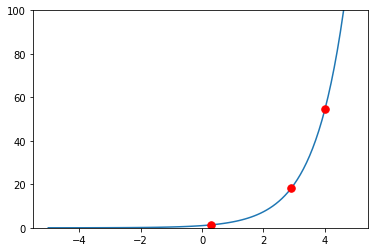

In [58]:
x = np.arange(-5.0, 5, 0.1)
y = np.exp(x)
z1 = np.array([0.3, 2.9, 4.0])
z2 = np.exp(z1)
plt.plot(x, y)
for i in range(0, 3):
    plt.plot(z1[i], z2[i], marker='.', color='r', markersize=15)
plt.plot()
plt.ylim(0, 100)
plt.show()

図4-3

「x」の値が大きくなればなるほど「y」の値が大きくなっていることがわかりますね。

そして、先ほどの「a」の要素とそれに対応する「y」の要素をプロットしてみました。

もちろんソフトマックス関数ではもう少し複雑な計算を行なっていますが、単なる指数関数として考えても問題ないのでここではそうします。

図で考えるとわかりやすいですね。

「a」の最大値は図一番右にある点、つまり２番目の要素であり、「y」の最大値は図の一番上にある点、つまり２番目の要素であることがわかります。

ニューラルネットワークのクラス分類では、一般的に、出力の一番大きいニューロンに相当するクラスだけを認識結果とします。

そして、ソフトマックス関数を適用しても、出力の一番大きいニューロンの場所は変わりません。

#### ということは、別にソフトマックス関数を使う必要ないんじゃない？って思いますよね。

そうなんです。ニューラルネットワークが分類を行う際は、出力層のソフトマックス関数を省略することができるのです。

実際の問題では、指数関数の計算は、それなりにコンピュータの計算が必要になるので、出力層のソフトマックス関数は省略するのが一般的になります。

#### あれ？省略するのが一般的？どうしてわざわざ勉強したの？

「意味はないが、とりあえず勉強してもらった。」なんていやらしいことはしません。

もちろん、出力層にソフトマックス関数を用いることにちゃんとした理由があるのです。

しかし、その理由は先の内容で説明するのでお預けとなります。

### 4-4. 出力層のニューロンの数

出力層のニューロンの数は、解くべき問題に応じて、適宜決める必要があります。

クラス分離を行う問題では、出力層のニューロンの数は分類したいクラスの数に設定するのが一般的です。

例えば、ある入力画像に対して、その画像の数字が０から９のどれかを予測する問題では、出力層のニューロンは１０個に設定します。

<img src = "img2_21.png" style="width: 500px; float:left;">

図4-4

この例では、出力層のニューロンは上から順に数字の０、１、$\cdots$、９に対応するとします。

今回、「y<sub>2</sub>」のニューロンが一番高い値を出力しているとします。

その場合、入力に対し、「y<sub>2</sub>」に該当するクラス、つまり「２」であることを、このニューラルネットワークが予測していることを予測していることを意味します。

## 5. 手書き数字認識

ニューラルネットワークの仕組みを学んできました。

今からは実践的な問題に取り組んでいきます。

何をするかと言いますと、手書き数字画像の分類を行いたいと思います。

4-4章で説明したように、入力画像がどの数字なのかを分類するというのを行なっていきます。

学習はすでに完了したものとして、学習済みのパラメータを使って、ニューラルネットワークの「推論処理」だけを実装していきます。

なお、この推論処理は、ニューラルネットワークの順方向伝播とも言います。

本来、ニューラルネットワークを使って問題を解く場合、はじめに訓練データを使って重みパラメータの学習を行い、推論時には、先に学習したパラメータを使って、入力データの分類を行います。

### 5-1. MNISTデータセット

ここで使用するデータセットはMNISTという手書きの数字の画像セットです。

MNISTは機械学習の分野で最も有名なデータセットの１つであり、簡単な実験から論文として発表される研究まで、さまざまな場所で利用されています。

実際に使われていると聞くとなんだか本格的になってきたような気がしますね。

話を戻します。

MNISTデータセットは、０から９までの数字画像から構成されます。

訓練画像が56000枚、テスト画像が14000枚用意されており、それらの画像を使用して学習と推論を行います。

一般的にMNISTデータセットの使い方では、訓練画像を使って学習を行い、学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測します。

MNISTの画像データは２８×２８のグレー画像で、各ピクセルは０から２５５までの値を取ります。

この画像は「７」、この画像は「２」といったように、対応するラベルが与えられています。

いきなり画像の話になったので、少しわかりにくいかもしれません。

そんな時は図で確認しましょう。

<img src = "img2_22.png" style="width: 600px; float:left;">

図5-1

画像データは２８×２８＝７８４個のブロックに分けられており、それぞれのブロックに０から２５５までの値が格納されているのです。

じゃあ、０から２５５ってなんの数字？ってなりますよね。

先ほどMNISTの画像データはグレー画像と言いました。

グレーとは、みなさんご存知のねずみ色のグレーです。

つまり、０から２５５までの値は白黒の濃淡を表しているんですね。

このマスは、この色だ！という色の情報ではなく、

このマスは、この明るさだ！といった明るさの情報だけを含んでいるのです。

何を表しているのかはわかったけど、どうして０から２５５なのか。

それは、１マスを８ビットで表しているからです。

前回、半加算器や全加算器を学習する際にビットについて説明しました。

１ビットは「０」か「１」の二択であるということを覚えていますか？

今回は８ビットあります。

ということは、「０」か「１」の二択が８個あるので「2<sup>8</sup>」通り表現できるということがわかります。

例えば、「００００００００」や「０００００００１」や「１１１１１１１１」など、２５６通りはここに載せるは大変なので３つだけ挙げておきます。

そして「００００００００」を黒、「１１１１１１１１」を白といったように決めているのです。

このことから、１マスにつき０から２５５までの数値が与えられる理由がわかりましたね。

<img src = "img2_23.png" style="width: 600px; float:left;">

図5-2

### 5-2. Scikit-learnによるMNISTの読み込みと画像表示

今からMNISTデータを読み込んでいくのですが、今回は「scikit-learn」という機械学習用のライブラリを使っていきます。

いつものようにインポートすればいいのですが、もしかしたら「scikit-learn」が「Anaconda」にインストールされていない可能性があります。

その場合、エラーが出てしまいその先に進めないと思うので、一度確認することをおすすめします。

では、確認の仕方とインストールの仕方を説明します。



<img src="img2_34.png" style="width: 900px; float:left;">

図5-3

この画面は「JupyterLab」を開く前の画面になります。

まず最初に「Anaconda Navigator」の「Home」から「Environments」に移動してください。

次に「Search Packages」で「scikit-learn」を検索してください。

検索した時に「scikit-learn」が表示されていれば大丈夫です。

表示されていない方はインストールされていない証拠なので、「installed」と表示されているところを「Not installed」に変えてください。

「scikit-learn」が表示されると思います。

これをインストールしてください。

それでは、MNISTデータを読み込んでいきましょう。

In [3]:
import os 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
######「Shift + Enter」を押してください######

まず、表示と読み込みに必要なモジュールをインポートしていきます。

この「os」はオペレーションシステムのことであり、いわば汎用的に使われるコンピュータの基本機能を管理するシステムのことです。

「sklearn」は「scikit-learn」を使うためのモジュールになります。

また、「matplotlib」はグラフを描画するためのモジュールになります。

「from import」は初めて登場しましたが、これは”あるモジュール”に定義されている”ある関数”だけを読み込んでくれます。

では、「sklearn」からMNISTデータをダウンロードしていきます。

In [4]:
mnist = datasets.fetch_openml('mnist_784', data_home=os.pardir)
######「Shift + Enter」を押してください######

このように書くことで、MNISTデータをダウンロードすることができます。

この部分は、「ふーん。そうなんだ。」くらいで大丈夫です。

また、何度もデータを読み込むのは時間がかかるので、

「%store」を使って、読み込んだデータを保存します。

In [5]:
%store mnist

Stored 'mnist' (Bunch)


これをすることによって、一旦「JupyterLab」を閉じてもデータを保存することができるため、もう一度読み込む必要はありません。

しかし、MNISTデータを使いたい時は、以下のコードを使ってください。

In [6]:
%store -r

次に、ダウンロードしたMNISTデータから画像を表す数値データだけを取り出します。

In [7]:
data = mnist.data
print(data)
######「Shift + Enter」を押してください######

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


「mnist」の中には、このような数値以外にいろいろな情報が含まれているため、「data」だけを取り出す必要があります。

それでは、「data」について確認していきましょう。

In [8]:
data_max = max(data[0])
data_min = min(data[0])
print('Mnist data shape : {}'.format(data.shape))
print('Mnist min data : {}'.format(data_min))
print('Mnist max data : {}'.format(data_max))
######「Shift + Enter」を押してください######

Mnist data shape : (70000, 784)
Mnist min data : 0.0
Mnist max data : 255.0


「data」は、70000×784の形状をしていることがわかりますね。

これは、要素が784個の一次元配列が70000個あることを示しています。

784という数字はどこから来たのか。

MNISTの画像データは28×28であるということを思い出してください。

これを以下の図ように形状を変形します。

<img src = "img2_24.png" style="width: 600px; float:left;">

図5-4

また、各ピクセルは0から255の値を取るという話もしました。

上記の結果を見てもらうとわかるのですが、MNISTデータの最大値は255、最小値は0と表示していますね。

それでは、この値を正規化していきます。

この場合における正規化は、0から255の値を0.0から1.0の値に収まるようにすることを指します。

255を1.0にするにはどうしたらいいのか。

それは考えるとすぐにわかりますね。255で割ってやればいいのです。

それでは正規化していきましょう。

In [9]:
std_data = data / data_max
std_data_max = max(std_data[0])
std_data_min = min(std_data[0])
print("Standardization Mnist min data : {}".format(std_data_min))
print("Standardization Mnist max data : {}".format(std_data_max))
######「Shift + Enter」を押してください######

Standardization Mnist min data : 0.0
Standardization Mnist max data : 1.0


正規化できていることが確認できます。

では、次に正解ラベルを確認していきます。

In [10]:
label = mnist.target
unique_label = list(set(label))
######「Shift + Enter」を押してください######

ここで用いた「set()」は、重複する値を取り除き、重複しない要素のみを集めたものを返す関数になります。

以下に例を示します。

In [9]:
set([1, 1, 2, 2, 1, 3, 4, 4, 5])
######「Shift + Enter」を押してください######

{1, 2, 3, 4, 5}

このように、重複するデータを取り除いてくれます。

それでは、正解ラベルを見てみましょう。

In [11]:
unique_label
######「Shift + Enter」を押してください######

['9', '1', '4', '2', '5', '7', '3', '6', '8', '0']

正解ラベルは、0から9の値になることがわかりました。

では、０番目の画像はなんの数字が描かれているのでしょうか。

In [11]:
print("before encoding Mnist label(sample '0') : {}".format(label[0]))
######「Shift + Enter」を押してください######

before encoding Mnist label(sample '0') : 5


この結果からわかるように、０番目の画像には「５」が描かれていることがわかります。

では、この正解ラベルを「one-hot表現」として格納していきます。

「one_hot表現」とは、

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

のように、正解となるラベルだけが１で、それ以外は０の配列になります。

これは左から「０」、「１」、「２」・・・「９」に対応しています。

つまり、「５」と描かれている０番目の画像は、

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

と出力されることが予想できますね。

それでは実際に見てみましょう。

In [14]:
label = [int(x) for x in label]
one_hot_label = np.identity(10)[label]
one_hot_label[0]
######「Shift + Enter」を押してください######

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

まず、「label」は文字列なのでそのままでは計算することができません。

「one-hot表現」にするためには、「int型」に変換する必要があるのです。

int型に変換したlabelを0と1の組み合わせに変換することで、「one-hot表現」にすることができます。

前置きが長かったですね。

それでは、MNIST画像を表示させてみます。

今回は、０番目の画像を表示させます。

画像の表示にはPILモジュールを使用するパターンとmatplotlibモジュールを使用するパターンがあります。

まずはPILモジュールを使う方から見ていきましょう。

In [30]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
######「Shift + Enter」を押してください######

上記のコードが、画像を表示させる関数になります。

表示させる前に、画像データの形状を確認しましょう。

In [14]:
std_data[0].shape
######「Shift + Enter」を押してください######

(784,)

先ほども確認しましたが、「data」には要素が784個の一次元配列が格納されています。

しかし、画像は28×28の二次元配列になります。

何が言いたいのかというと一次元配列のままでは画像を表示することはできないので、元の形状である２８×２８のサイズに変形する必要があるということです。

また、「data」はただの数字の配列になります。

これを表示しても、ずらりと数字が並ぶだけで求めてるものではありません。

一度、見てみると納得できるかもしれません。

In [124]:
data[0]
######「Shift + Enetr」を押してください######

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

うわぁ！なんだこれ！ってなりますよね。

２８×２８＝７８４なので、７８４個分の数字が出てきます。

しかし、画像として表示するには、Numpyとして格納された画像データを、PIL用のデータオブジェクトに変換する必要があるのです。

この変換は、「Image.fromarray()」によって行うことができます。

In [31]:
img_show(data[0].reshape(28, 28))
######「Shift + Enter」を押してください######

おそらく以下のように表示されると思います。

In [34]:
Image.fromarray(np.uint8(data[0].reshape(28,28)))

ちなみに、「np.uint8()」は８ビットの符号なし整数を指定します。

では次にmatplotlibを用いたパターンを紹介します。

こちらの場合は簡単ですぐに表示することができます。

In [ ]:
plt.imshow(data[0].reshape(28, 28), cmap='gray')
plt.show()
######「Shift + Enter」を押してください######

「imshow()」は画像を表示する関数であり、「cmap」は色を指定するときに使います。

MNISTはグレー画像なので、「gray」と指定します。

これで、MNISTデータの読み込みと画像の表示の説明は終わりになります。

ここまで、文章ばかりで疲れたと思います。

一度、休憩を挟んでみてはどうでしょうか。

一息つくことも大事です。

休憩が終われば、上のコードを参考に画像を１つ表示してみましょう。

PILモジュールとmatplotlibモジュールのどちらを使うかはお任せします。

また、実装する際は、必要なモジュールをインポートし、MNISTデータを読み込むところから始めてみてください。

MNISTデータを使えるようになると何かと便利です！

##### 【問題5-1】x_test[1]の画像を表示してください。

In [ ]:
######以下にコードを書いてください######






######「Shift + Enter」を押してください######

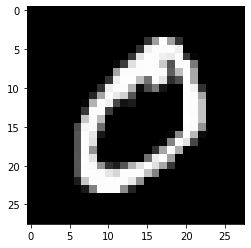

In [11]:
import os 
import matplotlib.pyplot as plt
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784', data_home=os.pardir)
data = mnist.data

plt.imshow(data[1].reshape(28, 28), cmap='gray')
plt.show()

### 5-3. ニューラルネットワークの推論処理

それでは、MNISTデータセットに対して、推論処理を行うニューラルネットワークを実装しましょう。

ネットワークは、入力層を７８４個、出力層を１０個のニューロンで構成します。

入力層の７８４という数字は、画像サイズの２８×２８＝７８４から、また、出力層の１０という数字は、１０クラス分類（０から９の１０クラス）から来ています。

また、隠れ層が２つあり、１つ目の隠れ層が５０個、２つ目の層が１００個のニューロンを持つものとします。

この５０と１００という数字は、任意の値に設定できます。

それではコードを書いていきましょう。

In [8]:
######初めてこのコードにたどり着いた場合、このコードを実行してください。######

class Network():
    def __init__(self, input_col_length,  ##入力値の列数
                 node1_col_length,  ##一つ目の隠れ層のノード数
                 node2_col_length,  ##二つ目の隠れ層のノード数
                 output_col_length, ##出力層の列数
                 weight_init_std   = 0.01):
        
        self.params = {}
        
        ### 重み W
        self.params['W1'] = weight_init_std * np.random.randn(input_col_length, 
                                                              node1_col_length)
        self.params['W2'] = weight_init_std * np.random.randn(node1_col_length, 
                                                              node2_col_length)
        self.params['W3'] = weight_init_std * np.random.randn(node2_col_length, 
                                                              output_col_length)       
        ### バイアス b
        self.params['b1'] = np.random.randn(node1_col_length)
        self.params['b2'] = np.random.randn(node2_col_length)        
        self.params['b3'] = np.random.randn(output_col_length)
        
def get_data():
    mnist = datasets.fetch_openml('mnist_784', data_home=os.pardir)
    %store mnist
    data = mnist.data
    label = mnist.target
    label = [int(x) for x in label]
    data_max = max(data[0])
    std_data = data / data_max
    x_train, x_test, t_train, t_test = train_test_split(std_data, label, test_size=0.2)
    return x_test, t_test

def predict(network, x):
    W1, W2, W3 = network.params['W1'], network.params['W2'], network.params['W3']
    b1, b2, b3 = network.params['b1'], network.params['b2'], network.params['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y
######「Shift + Enetr」を押してください######

In [18]:
######一度、「JupyterLab」を閉じた場合は、こちらのコードを実行してください。######

class Network():
    def __init__(self, input_col_length,  ##入力値の列数
                 node1_col_length,  ##一つ目の隠れ層のノード数
                 node2_col_length,  ##二つ目の隠れ層のノード数
                 output_col_length, ##出力層の列数
                 weight_init_std   = 0.01):
        
        self.params = {}
        
        ### 重み W
        self.params['W1'] = weight_init_std * np.random.randn(input_col_length, 
                                                              node1_col_length)
        self.params['W2'] = weight_init_std * np.random.randn(node1_col_length, 
                                                              node2_col_length)
        self.params['W3'] = weight_init_std * np.random.randn(node2_col_length, 
                                                              output_col_length)       
        ### バイアス b
        self.params['b1'] = np.random.randn(node1_col_length)
        self.params['b2'] = np.random.randn(node2_col_length)        
        self.params['b3'] = np.random.randn(output_col_length)
        
def get_data():
    %store -r
    data = mnist.data
    label = mnist.target
    label = [int(x) for x in label]
    data_max = max(data[0])
    std_data = data / data_max
    x_train, x_test, t_train, t_test = train_test_split(std_data, label, test_size=0.2)
    return x_test, t_test

def predict(network, x):
    W1, W2, W3 = network.params['W1'], network.params['W2'], network.params['W3']
    b1, b2, b3 = network.params['b1'], network.params['b2'], network.params['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y
######「Shift + Enetr」を押してください######

上記では「get_data()」、「predict()」といった２つの関数を定義し、「Network()」というクラスを作りました。

まず、「get_data()」は、MNISTデータを読み込む関数になります。

前回の読み込みの時のコードとほぼ一緒ですが、「train_test_split()」という関数が足されています。

この関数は、70000枚のMNIST画像を56000枚の訓練画像と14000枚のテスト画像に分けます。

「test_size」はテスト画像を何枚にするかどうかの数値になります。

「test_size=0.2」とすることで、70000枚の2割がテスト画像として用意されます。

「get_data()」は、最終的にテスト画像とテストラベルを返します。

次に、「Network()」というクラスについて説明します。

「network = Network(input_col_length,  ##入力値の数  
    node1_col_length,  ##一つ目の隠れ層のノード数  
    node2_col_length,  ##二つ目の隠れ層のノード数  
    output_col_length, ##出力層の列数)」
                 
というように、入力値の数、１つ目の隠れ層のノード数、２つ目の隠れ層のノード数、出力値の数を決めることで重みとバイアスをディクショナリ型の変数として得ることができます。

また、「random.randn(形状)」を用いることで、平均０・分散１の標準正規分布に従うランダムな数値を得ることができます。

ニューラルネットワークでは行列の計算を行うため、形状を考える必要がありますが、これに関しては、多次元配列の計算のところで学んだ内容なので説明は割愛します。

最後に「predict()」がありますが、これはニューラルネットワークの処理をまとめたものになります。

それでは、これらの関数を使って、ニューラルネットワークによる推論処理を行います。

それでは仕切り直して、Let's Go！

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

x, t = get_data()
network = Network(784, 50, 100, 10)

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))
###### 「Shift + Enter」を押してください######

Accuracy:0.10007142857142858


それでは、上記のコードについて説明していきます。

まず、テスト画像とテストラベルの取得を行います。

そしてその後に重みとバイアスの値を取り出します。

これで下準備は完了です。

次に「accuracy_cnt」を初期化します。

初期化します。なんて言われても「accuracy_cnt」ってなんだ？ってなりますよね。

「accuracy」は「正確さ」を表しており、ニューラルネットワークが予測した答えと正解ラベルとを比較して、正解した画像を数えていきます。

その時に用いる変数が「accuracy_cnt」であり、正解するたびに「＋１」していきます。

推論処理を行う前は、何もしてないので「accuracy_cnt」が０なのは当然ですね。

そして、「len(x)」は画像の枚数を表しており、その枚数分、推論処理を繰り返します。

「predict()」で各ラベルの確率を計算し、「np.argmax()」で一番大きな値を示しているインデックスを取り出します。

つまり、「この画像はこのラベルである確率が高い」と示しているインデックスを取り出すことになります。

そして、そのインデックスが正解のラベルと一致する場合、「accuracy_cnt」に「＋１」するといった処理を行います。

最後の画像までこれらの処理が終わると、「何枚中何枚が正解していたのか」を表す割合を計算して、表示します。

print()で表示するのは誰でも知っていると思うのですが、「"Accuracy:"」は文字列を示しており、文字列に並べて表示するには「float型」である数値を文字化する必要があります。

そこで「str()」を使えば、数値を文字化することができます。

文章を読むばかりで疲れましたよね。

実際に手を動かしましょうか。

【問題5-2】今までの内容を参考にして「Accuracy」を求めてください。

In [ ]:
######以下にコードを書いてください######


######「Shift + Enter」を押してください######

「0.10」付近の数値が表示されれば大丈夫です。

これは「10％」正しく分類することができた、ということを表しています。

つまり、全然ダメだということですね。

今回行う処理はここまでになりますが、ニューラルネットワークの構造や学習方法を工夫することで、この認識精度がさらに高くなっていきます。

また、MNISTデータを正規化しましたが、これによって、画像データの値が0.0~1.0の範囲に収まるように変換されました。

このように、ニューラルネットワークの入力データに対して、何らかの決まった変換を行うことを前処理と言います。

前処理はニューラルネットワークにおいて、実践的によく用いられます。

前処理の有効性は、識別性能の向上や学習の高速化など、多くの実験によって示されています。

つまり、何事にも工夫が必要ということですね。

### 5-4. バッチ処理

MNISTデータを扱ったニューラルネットワークの実装はどうでしたか？

最初の方に比べるとだいぶ応用的になり、面白くなってきたのではないでしょうか。

さらにスキルアップを目指して、「バッチ処理」について学習していきましょう。

まずは先ほどの実装の復習です。

入力データと重みパラメータの「形状」を確認します。

In [20]:
x, _ = get_data()
network = Network(784, 50, 100, 10)
######「Shift + Enetr」を押してください######

In [21]:
x.shape
######「Shift + Enetr」を押してください######

(14000, 784)

In [22]:
x[0].shape
######「Shift + Enetr」を押してください######

(784,)

このことからわかるのは、７８４個の要素からなる一次元配列が14000個あるということです。

In [61]:
network.params['W1'].shape
######「Shift + Enetr」を押してください######

(784, 50)

In [62]:
network.params['W2'].shape
######「Shift + Enetr」を押してください######

(50, 100)

In [63]:
network.params['W3'].shape
######「Shift + Enetr」を押してください######

(100, 10)

重みの形状を表示してみました。

これを見ると、多次元配列の対応する次元の要素数が一致していることが確認できますね。

そして、最終的には要素数が１０の一次元配列「y」が出力されることも図から見て取れます。

７８４個の要素からなる一次元配列が入力され、１０個の要素からなる一次元配列が出力されるという流れですが、これは14000枚の画像の中の一枚だけを入力した時の処理の流れになります。

じゃあ、複数枚入力したらどうなるの？って思いますよね。

では、画像を複数枚まとめて入力する場合を考えていきましょう。

１００枚にしてみましょう。

１００枚の画像を入力するということは、「x」の形状を１００×７８４にするということになります。

<img src = "img2_25.png" style="width: 500px; float:left;">

図5-5

上図を見てもらうとわかると思いますが、入力データが１００×７８４であれば、出力データは１００×１０になります。

つまり、一度に１００枚の画像を入力すると１００枚分の結果が出力されるのです。

x[0]とy[0]には０番目の画像と推論の結果が格納されています。

同様にx[1]とy[1]には１番目、x[2]とy[2]には２番目といったようになっています。

１００個のデータのようにまとまりのある入力データをバッチと呼びます。

バッチは「batch」と書きますが、「束」という意味があります。

「書類やお金などを束ねる」というように使いますよね。

１００枚の画像を入力データとして処理するといった、入力データに複数のデータを用いて処理することをバッチ処理と言います。

バッチ処理を行うことにはメリットがあります。

それは、一枚あたりの処理時間を短縮できるということです。

なぜなら、大きな配列の計算を効率よく処理できるような高度な最適化が行われており、バッチ処理のおかげでバス帯域の負荷を軽減できるからです。

バッチ処理を行うことで大きな配列の計算を行うことになり大変そうですが、大きな配列を一度に計算する方が、分割した小さい配列を少しずつ計算するよりも早く計算が完了するのです。

バッチ処理についてわかってもらえたと思いますが、前回実装したコードについて思い出してみてください。

前回は、一枚の画像を入力しました。

ということは、バッチ処理には対応してないのです。

それでは、バッチ処理に対応するように前回のコードを書き換えてみましょう。

In [31]:
x, t = get_data()
network = Network(784, 50, 100, 10)
accuracy_cnt = 0
######「Shift + Enetr」を押してください######

この部分は前回と同じ部分になります。

それでは違う部分を書いていきます。

まず、バッチの数を設定します。

In [24]:
batch_size = 100
######「Shift + Enetr」を押してください######

In [32]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
######「Shift + Enetr」を押してください######

Accuracy:0.09735714285714285


バッチ処理になるだけで、少し複雑なコードになりましたね。

それでは説明していきます。

「range()関数」は、「range(start, end, step)」のように指定すると、「start」から「end-1」までの整数からなるリストを作成するのですが、それらの数値は「step」の倍数になります。

In [123]:
list(range(0, 100, 5))
######「Shift + Enetr」を押してください######

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

上の例では、「０から９９までの数値で５の倍数」を表示しました。

今回はどうなるでしょうか。

見てみましょう！

In [ ]:
list(range(0, len(x), 100))
######「Shift + Enter」を押してください######

このリストをもとに、「x[i:i+batch_size]」のように、入力データからバッチを抜き出します。

これは、入力データのi番目から、(i+batch_size-1)番目までのデータを取り出します。

例えば、「i=100」の時、「x[100:200]」の１００枚が取り出されます。

つまり、「x[i:i+batch_size]」は、１００×７８４の入力データになります。

そのため、出力データは１００×１０になります。

次に、「argmax()」になりますが、これは最大値のインデックスを取得します。

言い換えると、リストの中で最大となる要素を探し、その要素が何番目に格納されているのかを確認する関数になります。

例を挙げて説明してみたいと思います。

以下のようなリストがあるとします。

In [3]:
x = np.array([0, 0, 1, 2, 1, 4, 8, 5])
######「Shift + Enter」を押してください######

このリストには８個の要素が格納されています。

詳しく説明すると、０番目には「０」、１番目は「０」、・・・、６番目には「８」、７番目には「５」が格納されています。

この場合では、「８」が一番大きな数値になるので、この数値が何番目の要素なのか、つまり、最大値のインデックスは何なのかを考えます。

「８」は６番目に格納されているので、「６」ということになります。

「argmax()」を使ってみると、

In [5]:
np.argmax(x)
######「Shift + Enter」を押してください######

6

といった結果が返ってきます。

このように「argmax()」は、最大値のインデックスを返す関数になります。

最大値のインデックスを取得って言われてもどこの最大値？ってなりますよね。

そこで「axis」を使います。

「axis」は「軸」という意味であり、「axis=0」は０次元目を軸に、「axis=1」は１次元目を軸にするという意味を持ちます。

言い換えると、「axis=0」は列方向、「axis=1」は行方向になります。

<img src = "img2_26.png" style="width: 500px; float:left;">

図5-6

今回は「axis=1」と設定しているので、各行で最大値を探し、最大値であるインデックスを返すことになります。

例えば以下のようになります。

In [28]:
x = np.array([[1, 2, 1], [2, 2, 3], [4, 2, 3]])
y = np.argmax(x, axis=1)
print(x)
print(y)
######「Shift + Enetr」を押してください######

[[1 2 1]
 [2 2 3]
 [4 2 3]]
[1 2 0]


上から０行、１行、２行とすると、０行目では１番目の要素「２」が一番大きいので「１」と返しているのがわかります。

１行目も２行目も同様に取り出していることがわかりますね。

では今回の場合では？

０番目から９９番目の画像を見てみます。

In [33]:
x_batch = x[0:100]
y_batch = predict(network, x_batch)
p = np.argmax(y_batch, axis=1)
print(p)
######「Shift + Enetr」を押してください######

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


０番目から９９番目の画像の予測した答えが出力されました。

今回の場合は学習が足りていないため、偏った予想になってしまっています。

最後に、予想した答えと正解ラベルを比較します。

「sum(p == t[i:i+batch_size])」とすることにより、「True/Fasle」からなるブーリアン配列を作成し、「True」の個数を算出します。

ブーリアン配列は、ステップ関数を実装するときに使いましたね。

以下に例を示します。

In [50]:
y = np.array([1, 2, 3, 4])
t = np.array([1, 1, 3, 1])
print(y == t)
######「Shift + Enetr」を押してください######

[ True False  True False]


In [51]:
np.sum(y == t)
######「Shift + Enetr」を押してください######

2

こうやって見るとわかりやすいですね。

これと同じことが先ほどの処理において行われているのです。

そして、Trueの数を数え、それを０と初期化した「Accuracy_cnt」に足します。

これで一連の流れが終了し、次は「x[100:200]」、次は「x[200:300]」・・・と「x[9900:10000]」の処理が終わるまで上記の流れを繰り返します。

これがバッチ処理になります。

ということで、今回学ぶべき内容が終了しました！

文章が多く読むのが大変だったと思いますが、どうだったでしょうか？

ニューラルネットワークの説明から入り、色々な活性化関数、その後には出力層に用いる活性化関数、そして多次元配列の計算、最後には処理を早くするバッチ処理。

色々な内容が出てきて大変でしたが、すべて大切な内容なのでしっかり学習してください。

一通り学習が終わったので、次の章につける問題に取り掛かってみてください。

今までは、学習してすぐに問題がありましたが、今回は総まとめ問題になるので、すべての知識が備わっていないと解けない問題になっています。

そこでしっかり知識が定着しているか確認してください。

______________

## 6. 問題集

皆さんは、色々な内容を学習し、経験値を得てレベルアップしてきました。

学んだ。で終わるのはもったいないです。

アウトプットしましょう！

【演習6-1】以下の図を参考に三層のニューラルネットワークを実装してください。
最終的には、数値が大きかった方のインデックスを出力するように実装してください。
また、隠れ層の活性化関数にはシグモイド関数、出力層の活性化関数にはソフトマックス関数を用いてもらいますが、それらの関数も自分で定義してください。
また、重みとバイアスなどの値はこちらが指定する値を使ってください。

<img src = "img2_12.png" style="width: 500px; float:left;">

<img src = 'img2_27.png' style="width: 500px; float:left;">

In [63]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

In [143]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

x = np.array([2.0, 3.0])
W1 = np.array([[4.0, 8.0, 1.0], [7.0, 3.0, 5.0]])
W2 = np.array([[2.0, 4.0], [6.0, 9.0], [1.0, 3.0]])
W3 = np.array([[2.0], [1.0]])
b1 = np.array([1.0, 1.5, 1.4])
b2 = np.array([1.2, 1.4])
b3 = np.array([1.1, 1.2])

a1 = np.dot(x, W1) + b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)
a3 = np.dot(z2, W3) + b3
z3 = softmax(a3)
print(z3)
y = np.argmax(z3)
print(y)

[0.47502081 0.52497919]
1


【演習6-2】以下の図を参考に同じ画像を出力してください。
画像を出力する際には、「matplotlib」モジュールを使用してください。

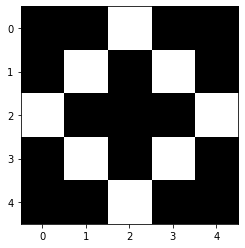

In [145]:
plt.imshow(z, cmap='gray')

In [ ]:
######以下にコードを書いてください######



######「Shift + Enter」を押してください######

【演習6-3】二層のニューラルネットワークを実装してください。
ただし、入力には問題１８の画像を使ってください。
また、画像をそのまま使うのではなく、正規化してください。
重みとバイアスはこちらが指定する値を使ってください。
(・・・を押してコピーしてください)

In [ ]:
W1 = np.array([[2.0, 1.0, 1.0],
               [1.0, 2.0, 0.5],
               [1.0, 0.5, 1.0],
               [1.0, 1.0, 1.0],
               [1.0, 1.0, 1.0],
               [0.5, 0.5, 2.0],
               [0.5, 1.0, 1.0],
               [1.0, 1.0, 0.5],
               [1.0, 1.0, 1.0],
               [1.0, 1.0, 1.0],
               [1.0, 2.0, 1.0],
               [2.0, 1.0, 1.0],
               [1.0, 1.0, 1.0],
               [0.5, 0.5, 0.5],
               [1.0, 1.0, 0.5],
               [1.0, 1.0, 1.0],
               [1.0, 2.0, 1.0],
               [1.0, 0.5, 1.0],
               [1.0, 1.0, 1.0],
               [0.5, 1.0, 2.0],
               [0.5, 0.5, 1.0],
               [1.0, 1.0, 1.0],
               [1.0, 0.5, 0.5],
               [1.0, 2.0, 0.5],
               [2.0, 1.0, 1.0]])
W2 = np.array([[2.0, 2.0],
               [3.0, 2.0],
               [1.0, 3.0]])

b1 = np.array([1.0, 2.5, 1.5])
b2 = np.array([2.0, 1.0])

In [ ]:
######以下にコードを書いてください######




######「Shift + Enter」を押してください######

_______

## 7. まとめ

みなさん、お疲れ様でした。

今回は、ニューラルネットワークを始め、多次元配列やMNISTデータについて学んできました。

少しハードな内容だったかもしれませんが、理解できない内容ではありませんので頑張ってみてください。

次回の内容にも影響するので、重要な内容となっております。

次回は何をするかというと、データの学習を行なっていきます。

データの学習？となりますよね。

今回、MNISTデータの認識を行なったと思いますが、精度が１０％程度で悪かったと思います。

それはなぜか。

重みやバイアスといったパラメータを乱数で取得し、それを使用したからです。

これは画像を認識する際に、適切なパラメータではなかったということです。

次回は、最適なパラメータを取得するといったことを学んでいきます。

なんだかワクワクしますよね！

それではまたお会いしましょう！

さようなら！